In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals
#Carregando as bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [23]:
#Importando o dataset do próprio keras (incluído no tensorflow)
data = keras.datasets.fashion_mnist

In [24]:
#Para o treinamento é passado 90% de todo o dataset, pois se passarmos todo o dataset, teoricamente, a rede neural já terá visto a imagem e saberá lidar com ela. Porém, se ver uma imagem totalmente nova, pode ser que erre.
#Como o Keras já é um dataset pronto, a função data.load_data() irá realizar um split dos dados de forma automática. Em nosso próprio dataset, teremos de selecionar "manualmente"
(train_images, train_labels), (test_images, test_labels) = data.load_data()

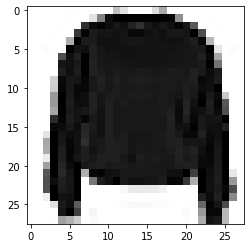

In [25]:
#Iremos classificar o tipo de classes que teremos em nosso dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#A imagem nada mais é do que um array de 28x28
#Para vermos a i (de 0 a 255)magem com o pyplot
#Porém, para diminuirmos o range de 255, dividimos tudo por 255, para obtermos valores de 0 até 1 (custo computacional), e a foto não mudará porra nenhuma
train_images = train_images/255.0
test_images = test_images/255.0
#O cmap é para vermos a foto com as cores corretas
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

In [35]:
#Criando um modelo!!
#Definindo o modelo da nossa neural network
#keras.layer.Flatten(input_shape) - Irá transformar a imagem (28x28) de array para um vetor
#keras.layer.Dense - Você irá passar o número de neurônios, e o tipo de função de ativação (Ela irá criar a hidden layer totalmente conectada)
#O segundo dense é uma segunda hidden layer que colocará os valores entre -1 e 1
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#Esse daqui é ele criando todo o modelo de cost function, explicado no word. Resumidamente, a função vai pegar os weigths que obtem menor valor de erro no treinamento
model.compile(optimizer="adamax", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [36]:
#Treinando o modelo!
#epochs, resumidamente, é quantas vezes você verá a imagem novamente
model.fit(train_images,train_labels,epochs=5)

#Para pegarmos o erro do modelo perante as imagens usadas de teste
test_loss, test_acc = model.evaluate(test_images, test_labels) 
f"Tested acc: {test_acc}"

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5541 - accuracy: 0.8124
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4201 - accuracy: 0.8528
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3834 - accuracy: 0.8648
Epoch 4/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3608 - accuracy: 0.8720
Epoch 5/5
10000/10000 [==============================] - 0s 46us/sample - loss: 0.3779 - accuracy: 0.8662


'Tested acc: 0.8661999702453613'

In [28]:
#Fazendo predicts com o modelo criado
#Ele irá retornar o predict de todas as imagens de teste(10000 imagens)
prediction = model.predict(test_images)
#Para fazer o predict de uma imagem é: model.predict([test_image[7]])

#prediction[0] - ele selecionou uma imagem em específico
#np.argmax vai pegar o index do maior valor presente no array
f"{class_names[np.argmax(prediction[0])]}"


'Ankle boot'

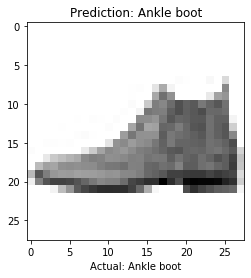

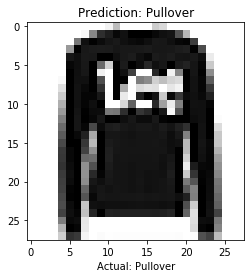

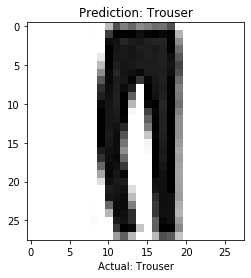

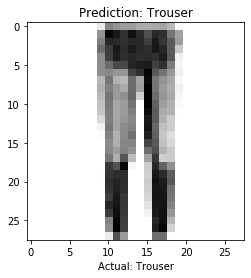

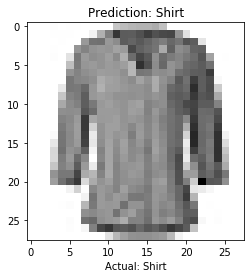

In [30]:
#Exibir uma sequência de predicts do modelo
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()